In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406830 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      406830 non-null  object 
 1   StockCode    406830 non-null  object 
 2   Description  406830 non-null  object 
 3   Quantity     406830 non-null  int64  
 4   InvoiceDate  406830 non-null  object 
 5   Price        406830 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      406830 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [12]:
df.describe()

,Quantity,Price,Customer ID
count,406830.000000,406830.000000,406830.000000
mean,12.061276,3.460507,15287.684160
std,248.693065,69.315080,1713.603074
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
df = df[(df["Quantity"]>0)&(df["Price"]>0)]
df.describe()

,Quantity,Price,Customer ID
count,397885.000000,397885.000000,397885.000000
mean,12.988208,3.116525,15294.416882
std,179.331551,22.097861,1713.144421
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
df["TotalAmount"]=df["Quantity"]*df["Price"]

<ipython-input-15-dc72b1b288a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalAmount"]=df["Quantity"]*df["Price"]


In [17]:
df["InvoiceDate"].dtype

dtype('O')

In [18]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df.head()

<ipython-input-18-9d7de08b186e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
max_date=df["InvoiceDate"].max()+pd.Timedelta(days=1)

In [21]:
df_grouped = df.groupby("Customer ID")

In [22]:
rfm_table= df_grouped.agg({"InvoiceDate":lambda x: (max_date-x.max()).days,
                          "Invoice": lambda x: len(x),
                          "TotalAmount": lambda x: x.sum()})
rfm_table.head()

,InvoiceDate,Invoice,TotalAmount
Customer ID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [24]:
rfm_table=rfm_table.rename(columns={"InvoiceDate":"Recency","Invoice":"Frequency","TotalAmount":"MonetaryValue"})
rfm_table.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,91.720839,2054.270609
std,100.014169,228.785054,8989.229895
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,307.415000
50%,51.000000,41.000000,674.485000
75%,142.000000,100.000000,1661.740000
max,374.000000,7847.000000,280206.020000


In [25]:
quantiles= (0.25, 0.5, 0.75)
quant = rfm_table.quantile(quantiles)
quant = quant.to_dict()
def R_calculator(x,recency,quantiles):
    if x <= quantiles[recency][0.25]:
        return 4
    elif x <= quantiles[recency][0.5]:
        return 3
    elif x <= quantiles[recency][0.75]:
        return 2
    else:
        return 1
    
def FM_calculator(x,FM,quantiles):
    if x <= quantiles[FM][0.25]:
        return 1
    elif x <= quantiles[FM][0.5]:
        return 2
    elif x<= quantiles[FM][0.75]:
        return 3
    else:
        return 4

    
rfm_table["R"]=rfm_table["Recency"].apply(R_calculator,args=("Recency",quant))
rfm_table["F"]=rfm_table["Frequency"].apply(FM_calculator,args=("Frequency",quant))
rfm_table["M"]=rfm_table["MonetaryValue"].apply(FM_calculator,args=("MonetaryValue",quant))

rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,326,1,77183.60,1,1,4
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


In [26]:
rfm_table["rfm_combined"]= rfm_table["R"].map(str) + rfm_table["F"].map(str) + rfm_table["M"].map(str) 
rfm_table["rfm_total"]=rfm_table["R"]+rfm_table["F"]+rfm_table["M"]
rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_combined,rfm_total
Customer ID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


<AxesSubplot:xlabel='Recency', ylabel='Count'>

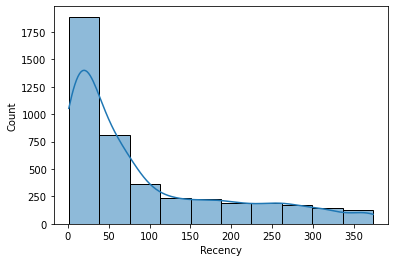

In [27]:
sns.histplot(rfm_table["Recency"],bins=rfm_table["rfm_total"].nunique(),kde=True)


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

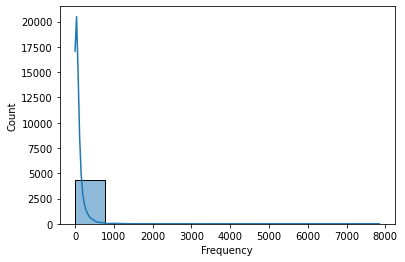

In [28]:
sns.histplot(rfm_table["Frequency"],bins=rfm_table["rfm_total"].nunique(),kde=True)


<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

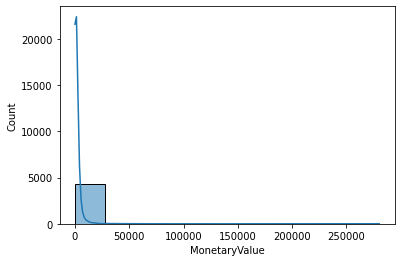

In [29]:
sns.histplot(rfm_table["MonetaryValue"],bins=rfm_table["rfm_total"].nunique(),kde=True)

In [30]:
rfm_table_logged = np.log(rfm_table.loc[:,"Recency":"MonetaryValue"])

<AxesSubplot:xlabel='Recency', ylabel='Count'>

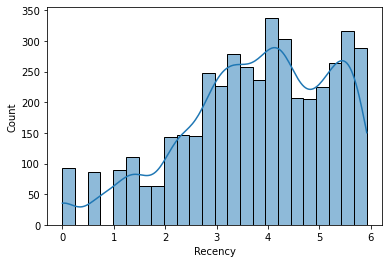

In [31]:
sns.histplot(data=rfm_table_logged["Recency"],kde=True)

<AxesSubplot:xlabel='Frequency', ylabel='Count'>

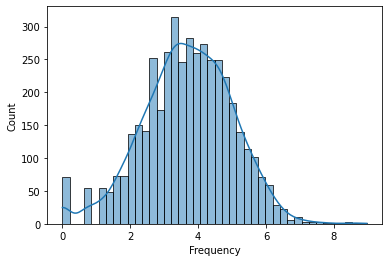

In [32]:
sns.histplot(data=rfm_table_logged["Frequency"],kde=True)

<AxesSubplot:xlabel='MonetaryValue', ylabel='Count'>

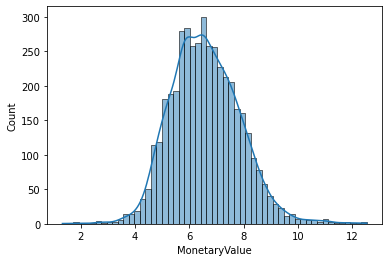

In [33]:
sns.histplot(data=rfm_table_logged["MonetaryValue"],kde=True)

In [34]:
scaler = StandardScaler()
scaler.fit(rfm_table_logged)

StandardScaler()

In [72]:
scaled_rfm_array = scaler.transform(rfm_table_logged)
rfm_table_scaled=pd.DataFrame(scaled_rfm_array, columns=["Recency","Frequency","MonetaryValue"])
rfm_table_scaled["Customer ID"] = rfm_table.index
rfm_table_scaled

,Recency,Frequency,MonetaryValue,Customer ID
0,1.409894,-2.775161,3.698714,12346.0
1,-2.146498,1.149545,1.410196,12347.0
2,0.383971,-0.185350,0.716415,12348.0
3,-0.574674,0.460575,0.698702,12349.0
4,1.374758,-0.638436,-0.617449,12350.0
...,...,...,...,...
4333,1.298690,-1.038620,-1.106089,18280.0
4334,0.999081,-1.307614,-1.743852,18281.0
4335,-1.178605,-0.901119,-1.117368,18282.0
4336,-1.662552,2.223510,0.837965,18283.0


###### elbow method

In [64]:
sse= {}
for i in range(1,21):
    kmean = KMeans(n_clusters=i,random_state=1)
    kmean.fit(scaled_rfm_array)
    sse[i]=kmean.inertia_

<AxesSubplot:>

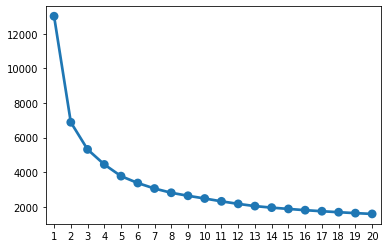

In [65]:
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_rfm_array)

KMeans(n_clusters=4)

In [75]:
rfm_table["Cluster"]=kmeans.labels_
rfm_table_scaled["Cluster"]=kmeans.labels_
rfm_table.head()

,Recency,Frequency,MonetaryValue,R,F,M,rfm_combined,rfm_total,Cluster
Customer ID,,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6,3
12347.0,2,182,4310.00,4,4,4,444,12,2
12348.0,75,31,1797.24,2,2,4,224,8,3
12349.0,19,73,1757.55,3,3,4,334,10,3
12350.0,310,17,334.40,1,1,2,112,4,1


In [76]:
rfm_table.groupby("Cluster").agg({"Recency":"mean","Frequency":"mean","MonetaryValue":{"mean","count"}})

Recency   Frequency MonetaryValue             
               mean        mean         count         mean
Cluster                                                   
0         19.183746   41.177856           849   632.073133
1        181.701678   14.506929          1371   290.568527
2         12.477950  287.032181           839  7219.041097
3         98.165754   79.918686          1279  1500.899830

In [77]:
rfm_table_melted = pd.melt(rfm_table_scaled.reset_index(),id_vars=["Customer ID","Cluster"],value_vars=["Recency","Frequency","MonetaryValue"],var_name="Metrics",value_name="Value")
rfm_table_melted.head()

,Customer ID,Cluster,Metrics,Value
0,12346.0,3,Recency,1.409894
1,12347.0,2,Recency,-2.146498
2,12348.0,3,Recency,0.383971
3,12349.0,3,Recency,-0.574674
4,12350.0,1,Recency,1.374758


<AxesSubplot:title={'center':'Snake Plot of RFM Table'}, xlabel='Metrics', ylabel='Value'>

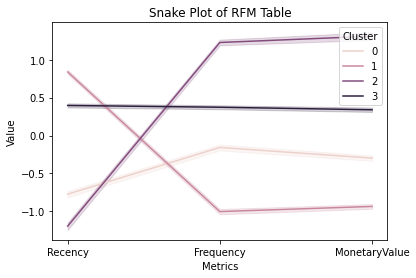

In [78]:
plt.title("Snake Plot of RFM Table")
sns.lineplot(data=rfm_table_melted,x="Metrics",y="Value",hue="Cluster")